In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [122]:
data=pd.read_csv(r'train_HK6lq50.csv',encoding="utf=8")

In [123]:
data.head(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1


In [124]:
data.shape

(73147, 16)

In [125]:
data.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [126]:
corr = data.corr(method='pearson')#.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
corr

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
program_duration,1.000000,0.204855,0.148651,-0.022368,-0.018989,-0.010128,0.099243,0.003545
test_id,0.204855,1.000000,0.148945,-0.001891,-0.027592,-0.134198,0.323748,0.074568
trainee_id,0.148651,0.148945,1.000000,-0.010190,0.108862,-0.074630,0.030465,0.035900
city_tier,-0.022368,-0.001891,-0.010190,1.000000,-0.072843,0.016746,-0.052799,-0.068663
age,-0.018989,-0.027592,0.108862,-0.072843,1.000000,-0.071842,0.187405,0.073969
total_programs_enrolled,-0.010128,-0.134198,-0.074630,0.016746,-0.071842,1.000000,0.083781,-0.031695
trainee_engagement_rating,0.099243,0.323748,0.030465,-0.052799,0.187405,0.083781,1.000000,0.197383
is_pass,0.003545,0.074568,0.035900,-0.068663,0.073969,-0.031695,0.197383,1.000000


In [140]:
df1=data.dropna()
df1.head(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1
15,10276_65,U_1,U,134,65,offline,vary hard,10276,M,High School Diploma,2,45.0,2,Y,2.0,0
16,9774_104,X_3,X,136,104,offline,hard,9774,M,High School Diploma,1,28.0,2,N,5.0,0


In [142]:
df1.shape

(45372, 16)

1    31504
0    13868
Name: is_pass, dtype: int64


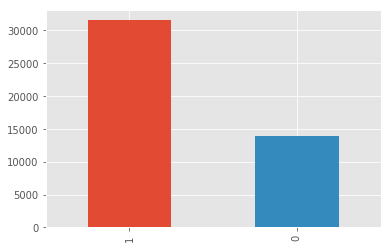

In [143]:
print(df1['is_pass'].value_counts())
df1['is_pass'].value_counts().plot.bar()

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45372 entries, 0 to 73146
Data columns (total 16 columns):
id                           45372 non-null object
program_id                   45372 non-null object
program_type                 45372 non-null object
program_duration             45372 non-null int64
test_id                      45372 non-null int64
test_type                    45372 non-null object
difficulty_level             45372 non-null object
trainee_id                   45372 non-null int64
gender                       45372 non-null object
education                    45372 non-null object
city_tier                    45372 non-null int64
age                          45372 non-null float64
total_programs_enrolled      45372 non-null int64
is_handicapped               45372 non-null object
trainee_engagement_rating    45372 non-null float64
is_pass                      45372 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 5.9+ MB


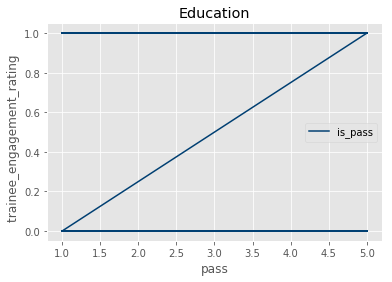

In [145]:
from matplotlib import style
style.use('ggplot')
df.plot(x='trainee_engagement_rating', y='is_pass', color='#003F72')  
plt.title('Education') 
plt.xlabel('pass')  
plt.ylabel('trainee_engagement_rating   ')  
plt.show()

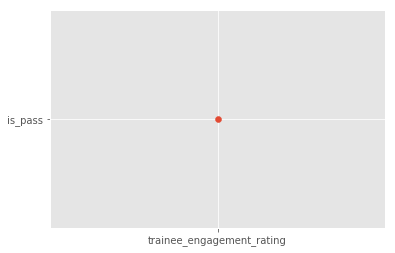

In [146]:
plt.scatter("trainee_engagement_rating","is_pass")

In [147]:
from sklearn import linear_model
import statsmodels.api as sm
X = df1[['is_pass','trainee_engagement_rating']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['age']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 33.094171041597164
Coefficients: 
 [0.73994492 1.21842885]
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     859.0
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:14:17   Log-Likelihood:            -1.6343e+05
No. Observations:               45372   AIC:                         3.269e+05
Df Residuals:                   45369   BIC:                         3.269e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [150]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [152]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.70
Accuracy of LDA classifier on test set: 0.69


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

In [301]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.70
Accuracy of GNB classifier on test set: 0.69


In [154]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


In [158]:
#Extracting Independent and dependent Variable  
x= df1.iloc[:, [11,14]].values  
y= df1.iloc[:, 15].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  
  
#feature Scaling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.66
Accuracy of K-NN classifier on test set: 0.66


In [159]:
#Extracting Independent and dependent Variable  
x= df1.iloc[:, [11,14]].values  
y= df1.iloc[:, 15].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  
  
#feature Scaling
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.69


In [160]:
#Extracting Independent and dependent Variable  
x= df1.iloc[:, [11,14]].values  
y= df1.iloc[:, 15].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  
  
#feature Scaling
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.70
Accuracy of SVM classifier on test set: 0.69


In [390]:
#Extracting Independent and dependent Variable  
x= df1.iloc[:, [11,14]].values  
y= df1.iloc[:, 15].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=15)  
  
#feature Scaling
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(loss = "modified_huber", alpha=0.05, random_state=10, max_iter=100, tol=None, penalty='elasticnet')
lsvm.fit(X_train, y_train)
y_pred = lsvm.predict(X_test)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_test))

lsvm using count vectors accuracy 0.702101087275933


In [164]:
#Extracting Independent and dependent Variable  
x= df1.iloc[:, [11,14]].values  
y= df1.iloc[:, 15].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  
  
#feature Scaling
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 150)
model.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))

Accuracy of SVM classifier on training set: 0.70


In [185]:
y_pred = knn.predict(X_test)
print('KNN using count vectors accuracy %s' % accuracy_score(y_pred, y_test))

KNN using count vectors accuracy 0.6600058771672054


In [327]:
y_pred = logreg.predict(X_test)
print('logreg using count vectors accuracy %s' % accuracy_score(y_pred, y_test))

logreg using count vectors accuracy 0.6918895092565384


In [331]:
y_pred = lsvm.predict(X_test)
print('SGD using count vectors accuracy %s' % accuracy_score(y_pred, y_test))

SGD using count vectors accuracy 0.6918895092565384


In [399]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

In [240]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', KNeighborsClassifier())
])

NameError: name 'TfidfVectorizer' is not defined

In [241]:
Pipeline

sklearn.pipeline.Pipeline

In [400]:
Pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', DecisionTreeClassifier()) #step2 - classifier
])
Pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'))]

In [401]:
from sklearn.model_selection import cross_validate

scores = cross_validate(Pipeline, X_train, y_train)
scores

{'fit_time': array([0.41511655, 0.02795076, 0.0239377 ]),
 'score_time': array([0.01198673, 0.00399685, 0.00502014]),
 'test_score': array([0.68990271, 0.69065835, 0.69129038]),
 'train_score': array([0.69376092, 0.69366646, 0.69325588])}

In [402]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# save the model to disk
filename = 'Machine.pkl'
joblib.dump(model, filename)

['Machine.pkl']

In [245]:
 #Loading the Model
import operator
def getResponse(logreg):
    ispass = {}
    for x in range((logreg)):
        response = logreg[x][-1]
        if response in ispass:
            ispass[response] = 0
        else:
            ispass[response] = 1
    sortedVotes = sorted(ispass.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [403]:
final_test= pd.read_csv("test_wF0Ps6O.csv", encoding='latin1')

In [404]:

final_test1=final_test.fillna(final_test.median())

final_test1.head(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,39.0,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,39.0,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,39.0,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,39.0,2,N,2.0
5,18922_62,U_1,U,134,62,online,easy,18922,F,Matriculation,1,24.0,1,N,1.0
6,5499_29,T_3,T,134,29,online,easy,5499,F,High School Diploma,2,45.0,2,N,4.0
7,10150_125,Y_3,Y,135,125,offline,intermediate,10150,F,High School Diploma,1,33.0,4,N,2.0
8,10158_95,V_1,V,133,95,offline,easy,10158,F,High School Diploma,3,32.0,2,N,1.0
9,6215_17,T_4,T,120,17,online,easy,6215,F,High School Diploma,1,39.0,4,N,1.0


In [408]:
Selected_features = ['age','city_tier','trainee_engagement_rating']

In [409]:
final_test1['is_pass'] = clf.predict(final_test1[Selected_features])
final_test1['id'] = df1['id']

submission = final_test1[['id','is_pass']]

submission.to_csv("submission12.csv", index=False)

submission.tail()

,id,is_pass
31344,12914_42,1
31345,NaN,1
31346,15260_46,1
31347,NaN,1
31348,5369_34,1
